<a href="https://colab.research.google.com/github/AiswaryaHariharan/Deep-Learning/blob/main/Aiswarya_AISC2007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#** Assignment 2**

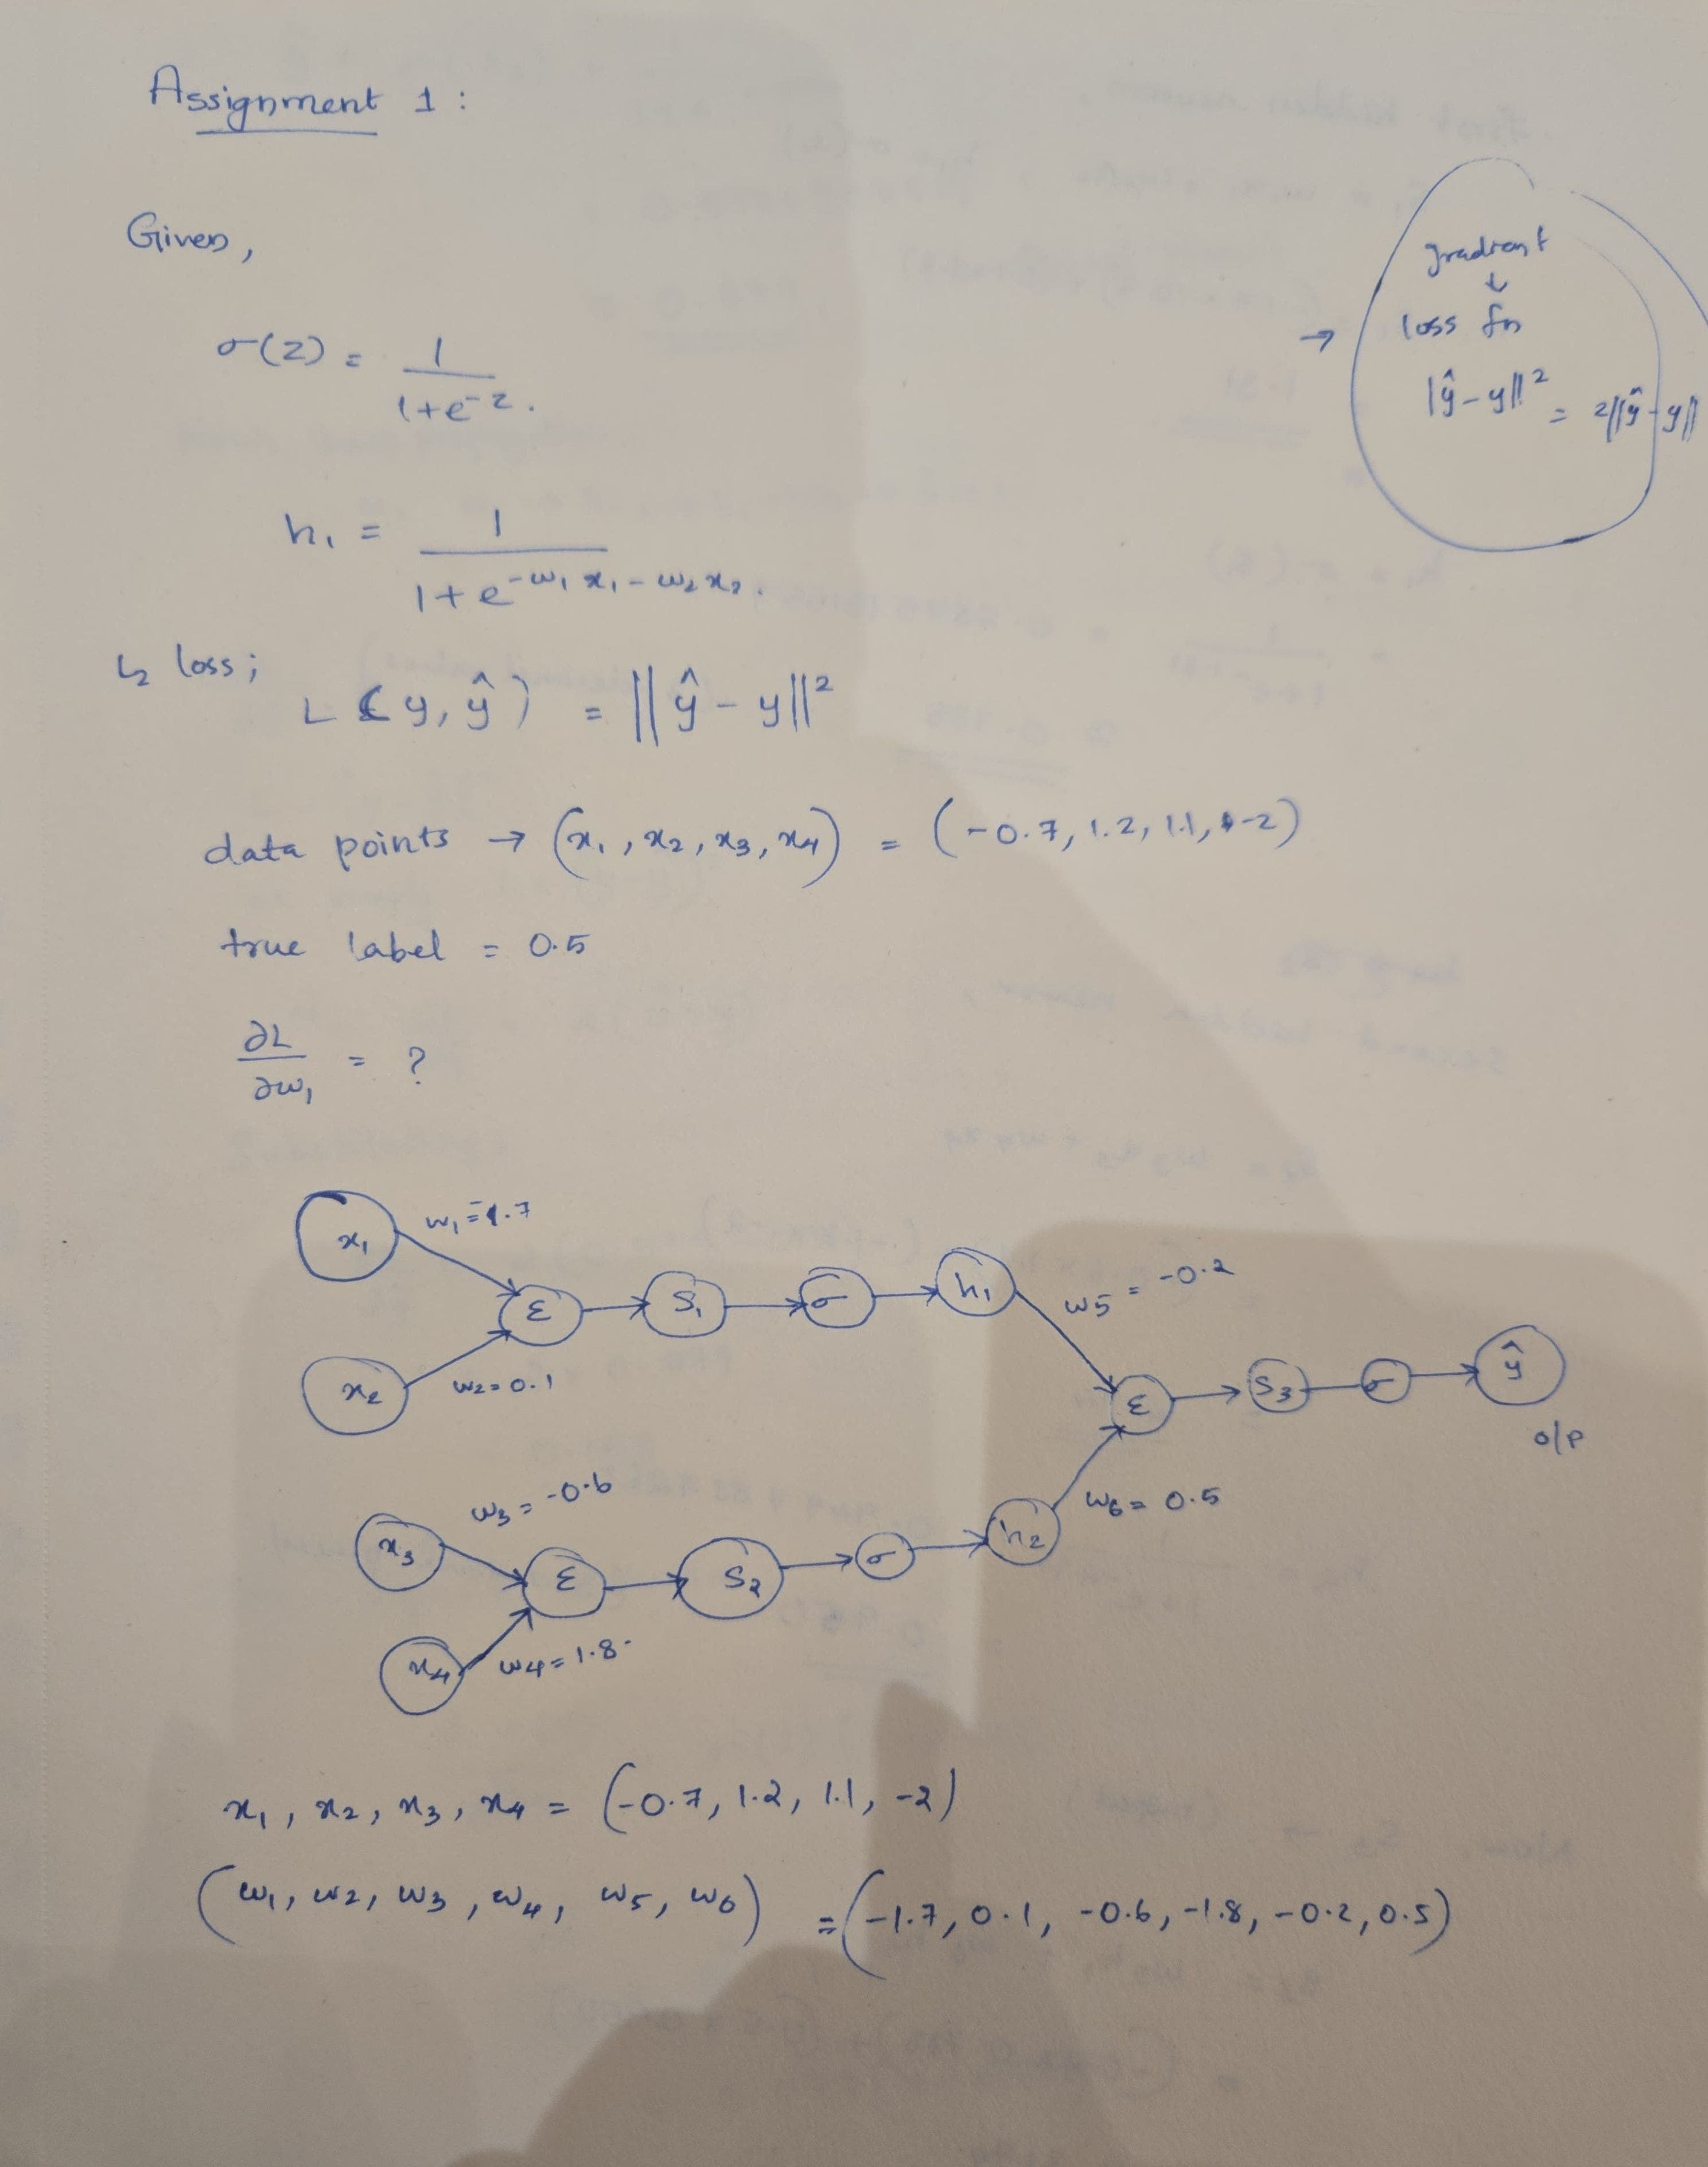



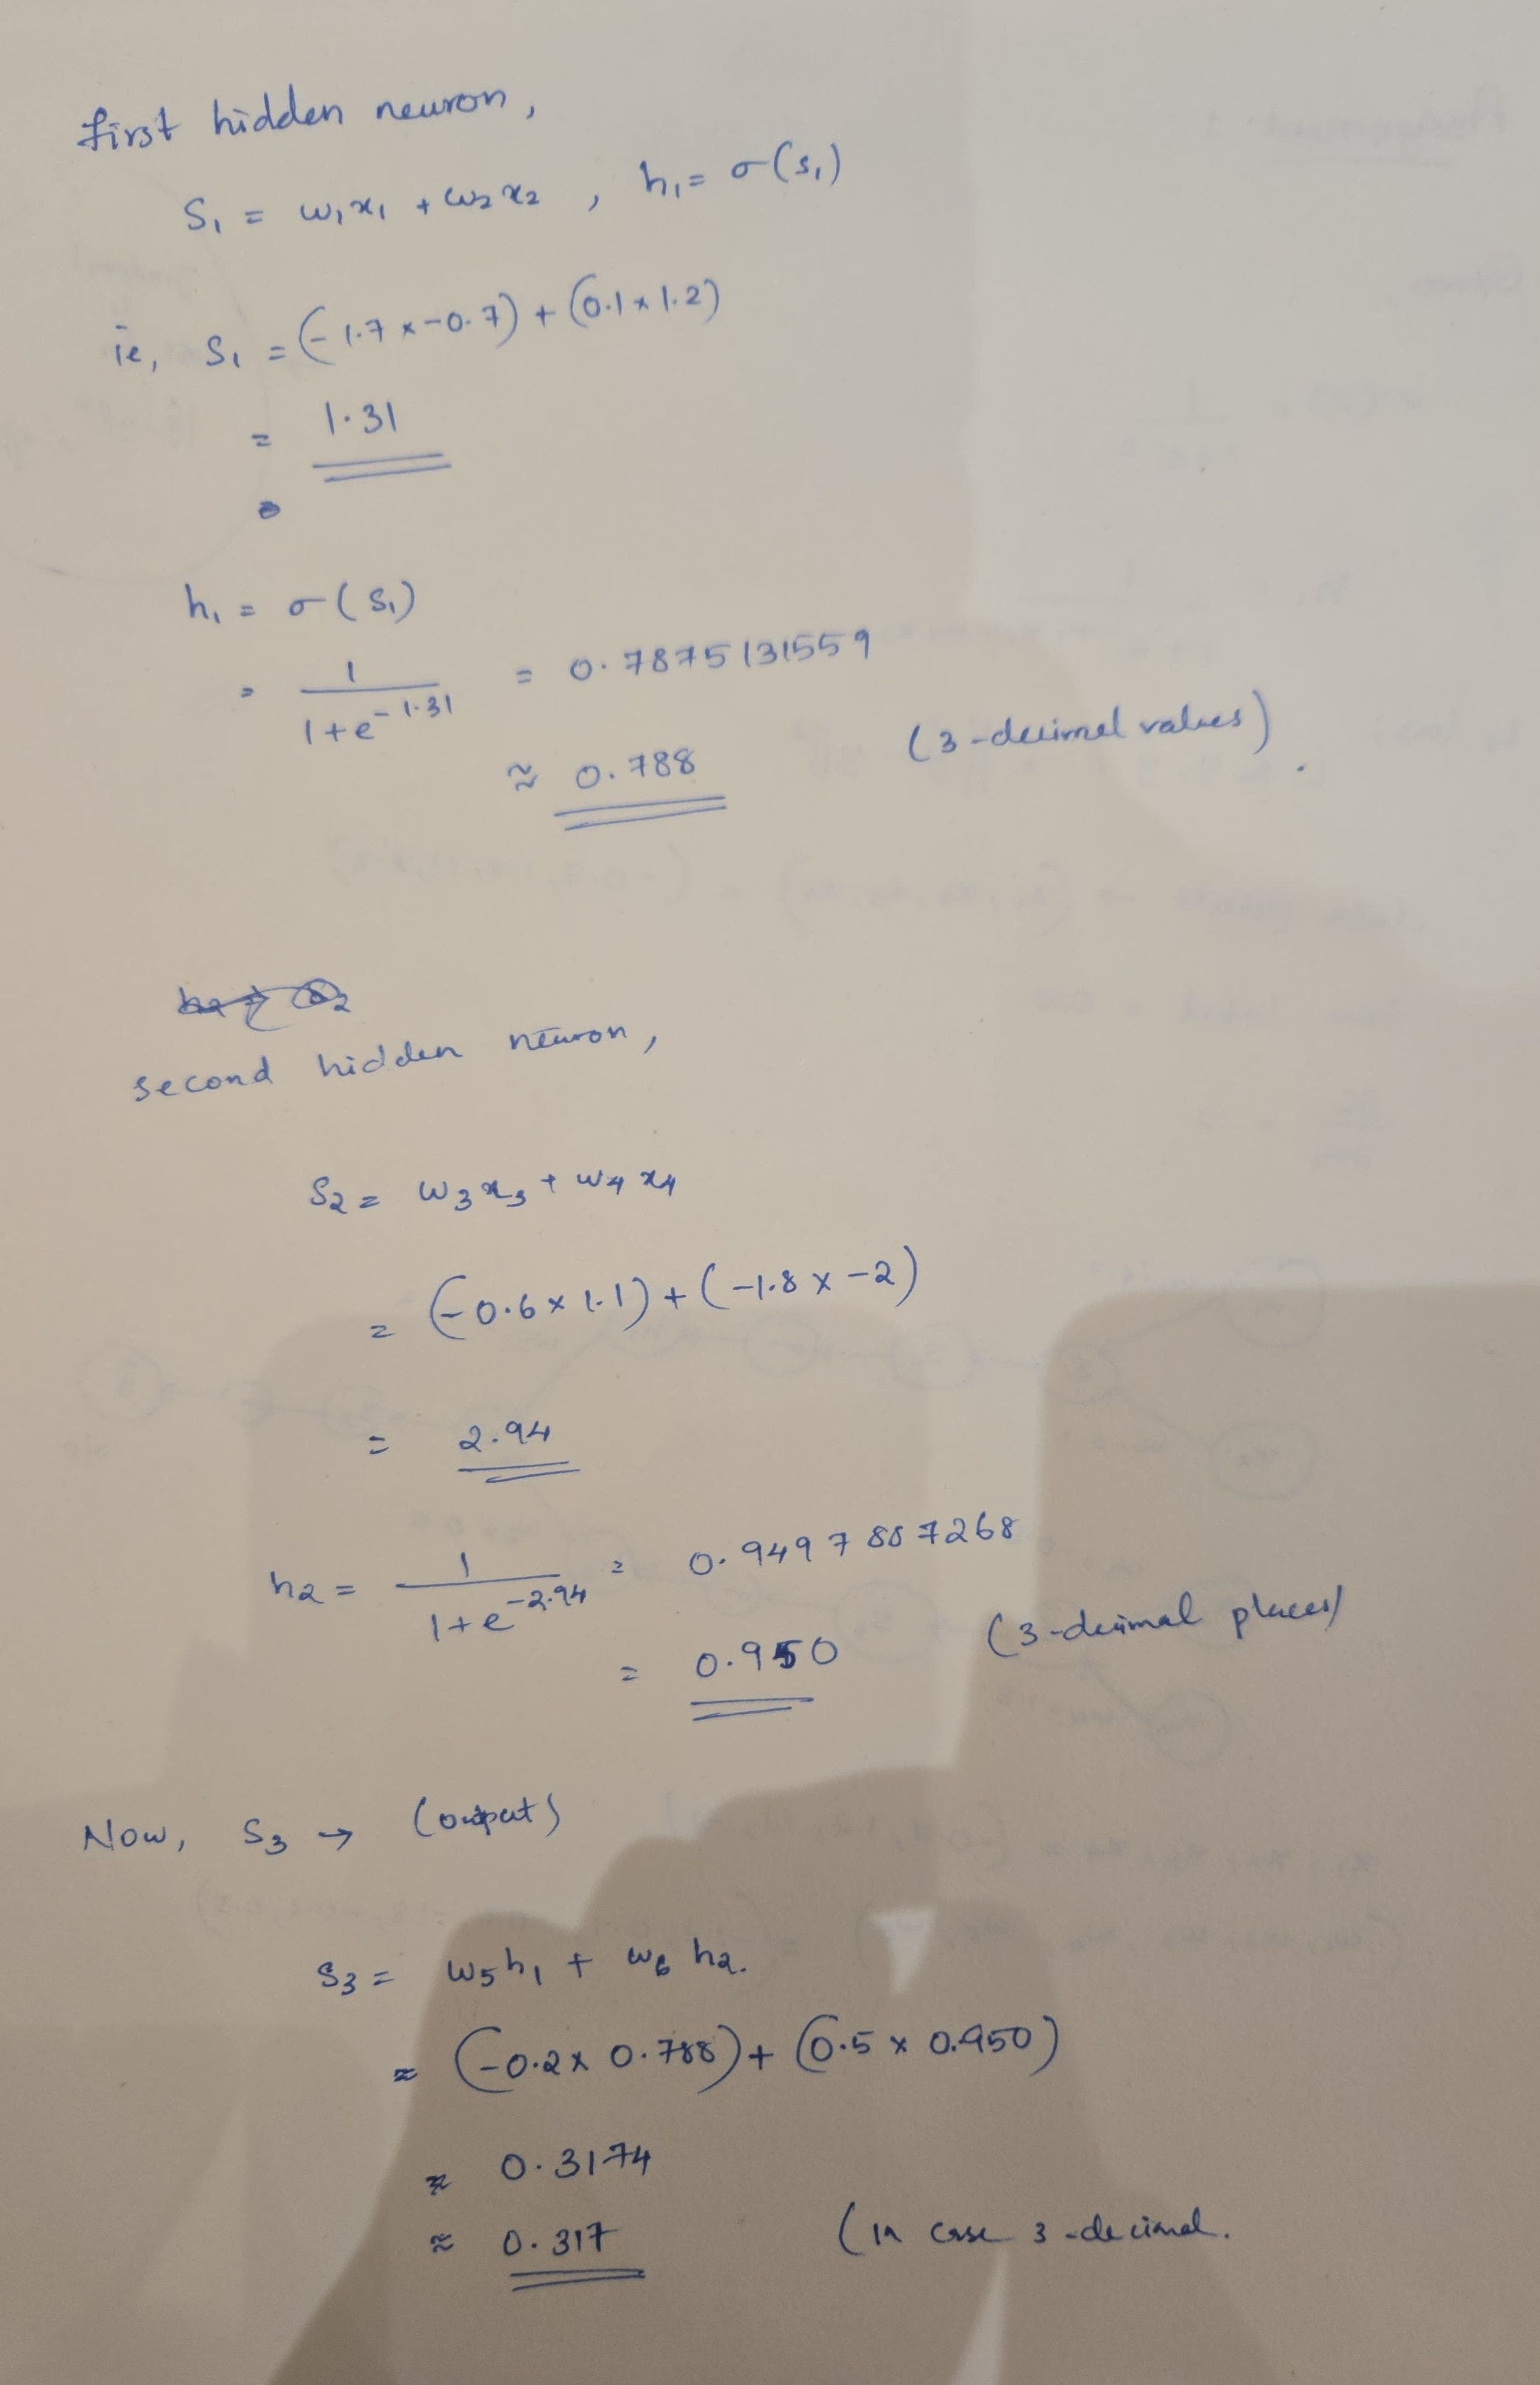

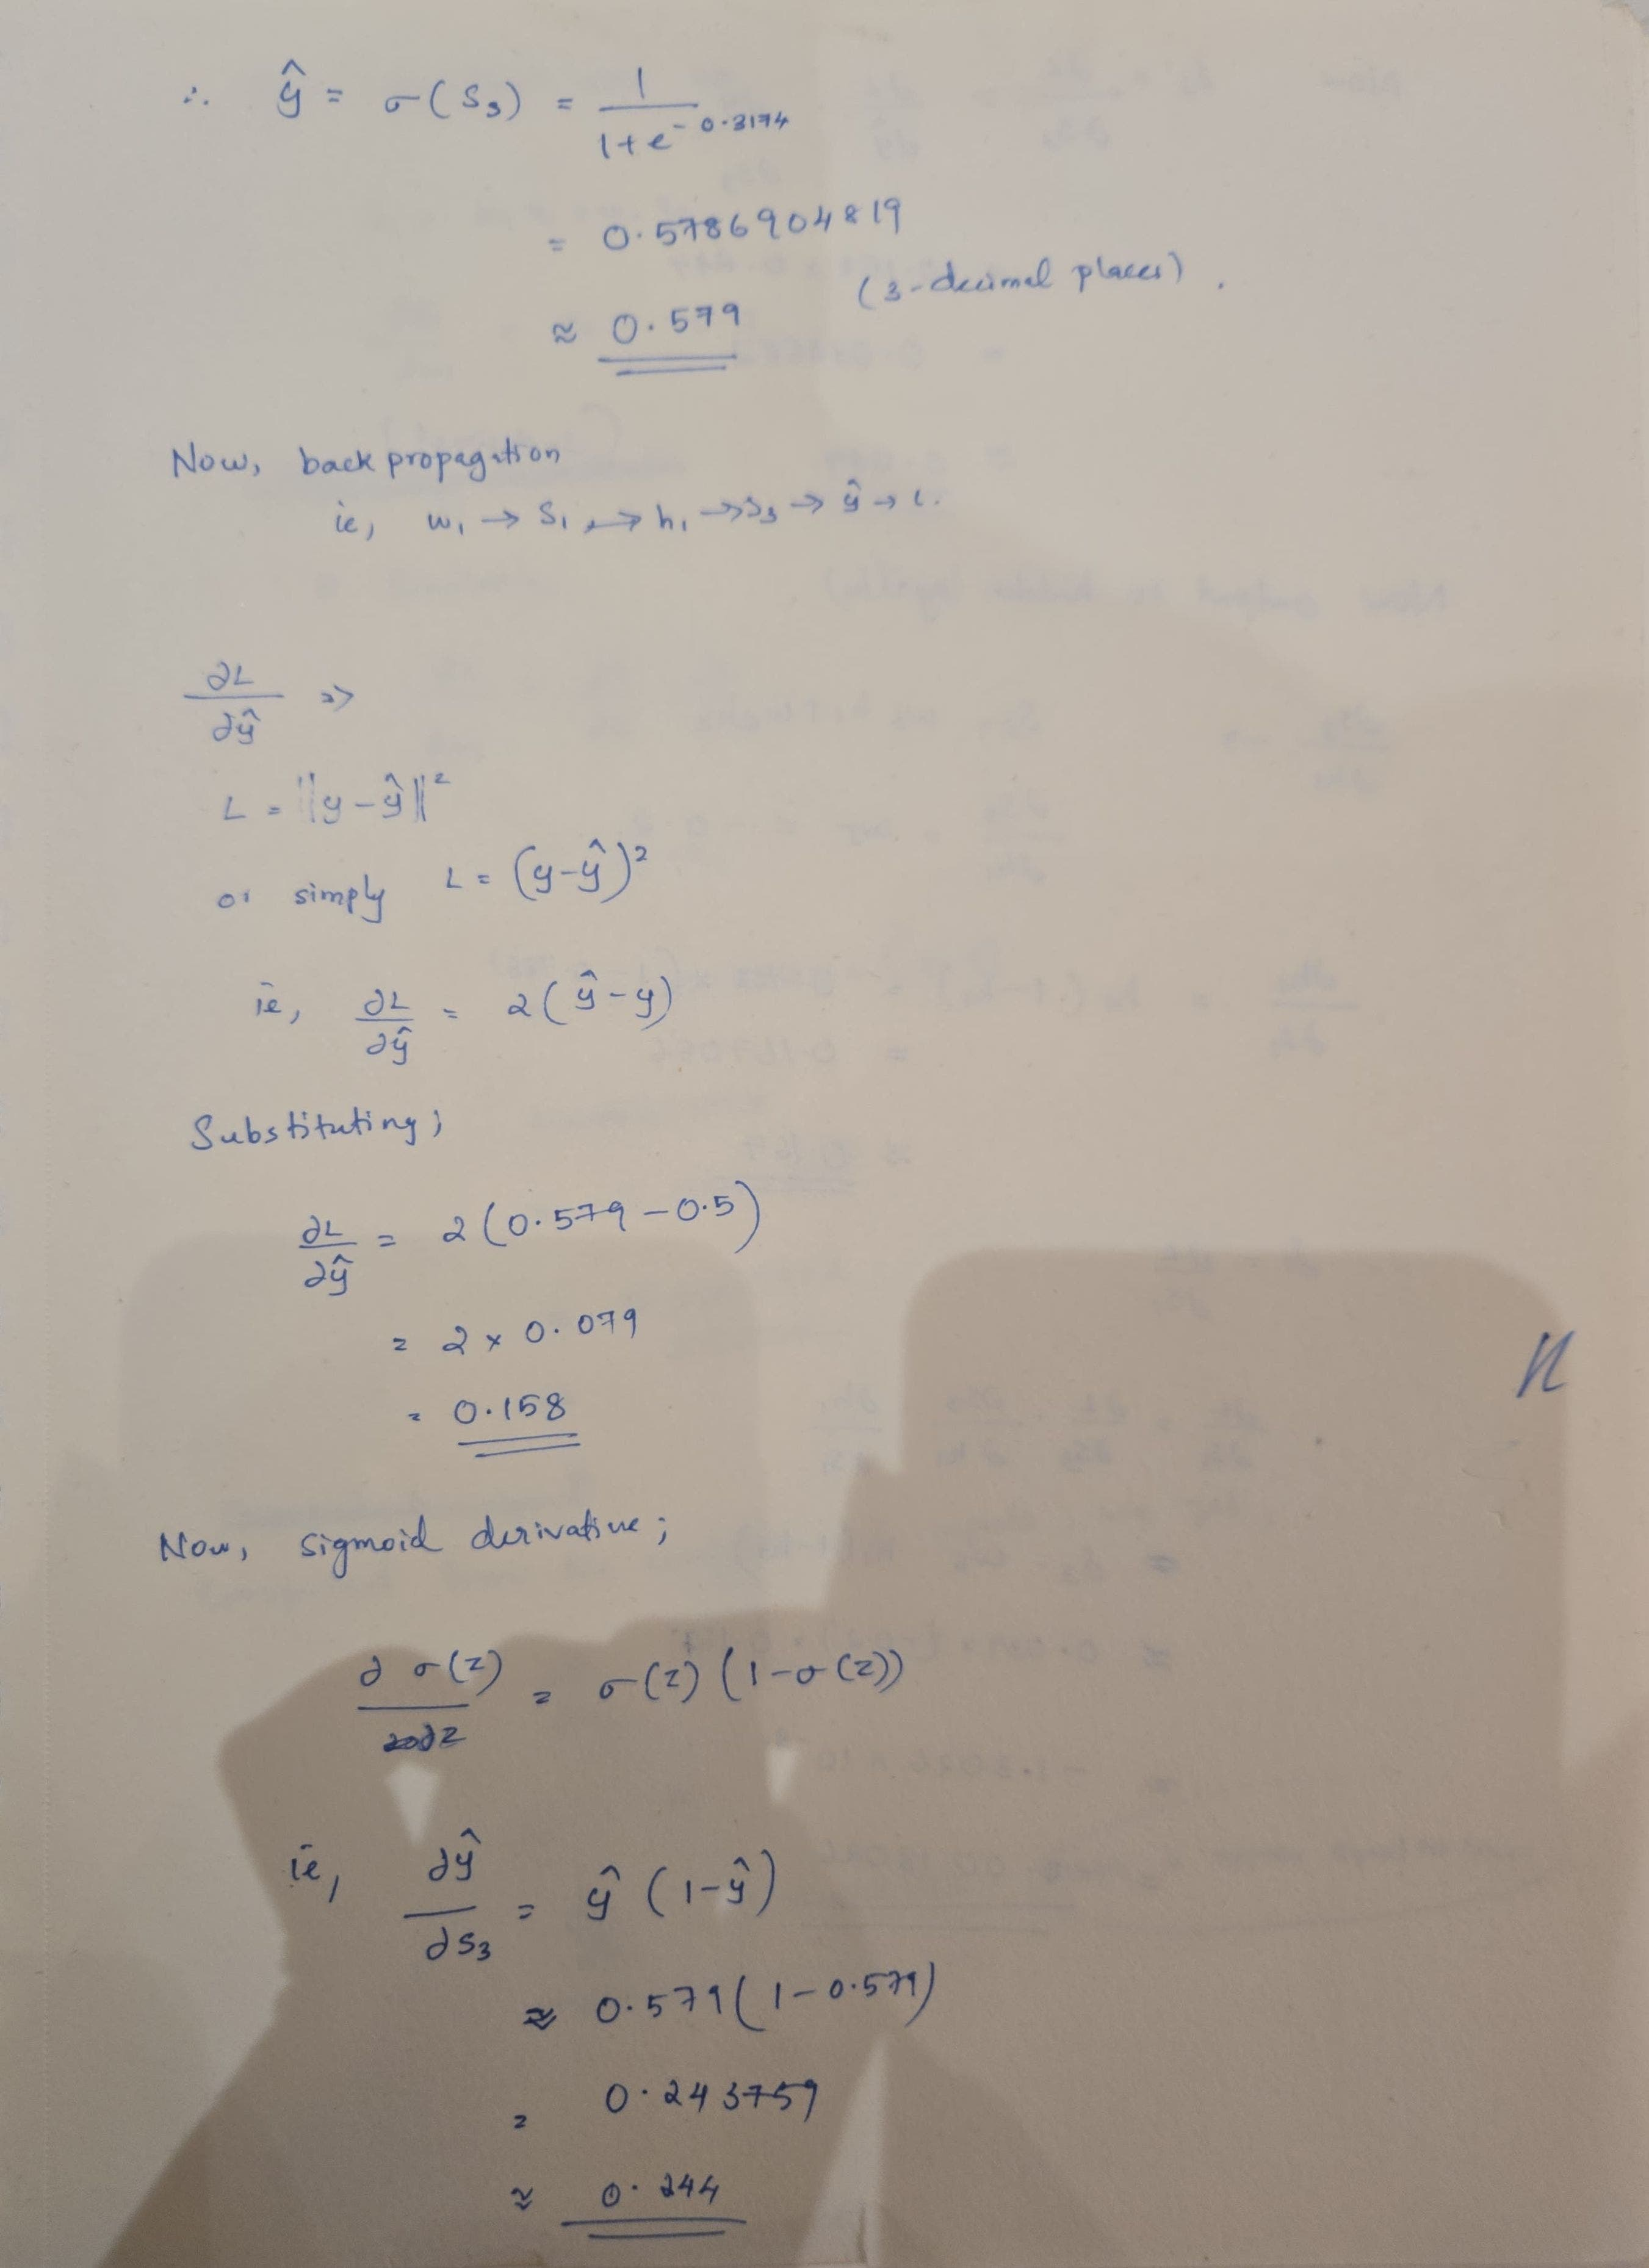

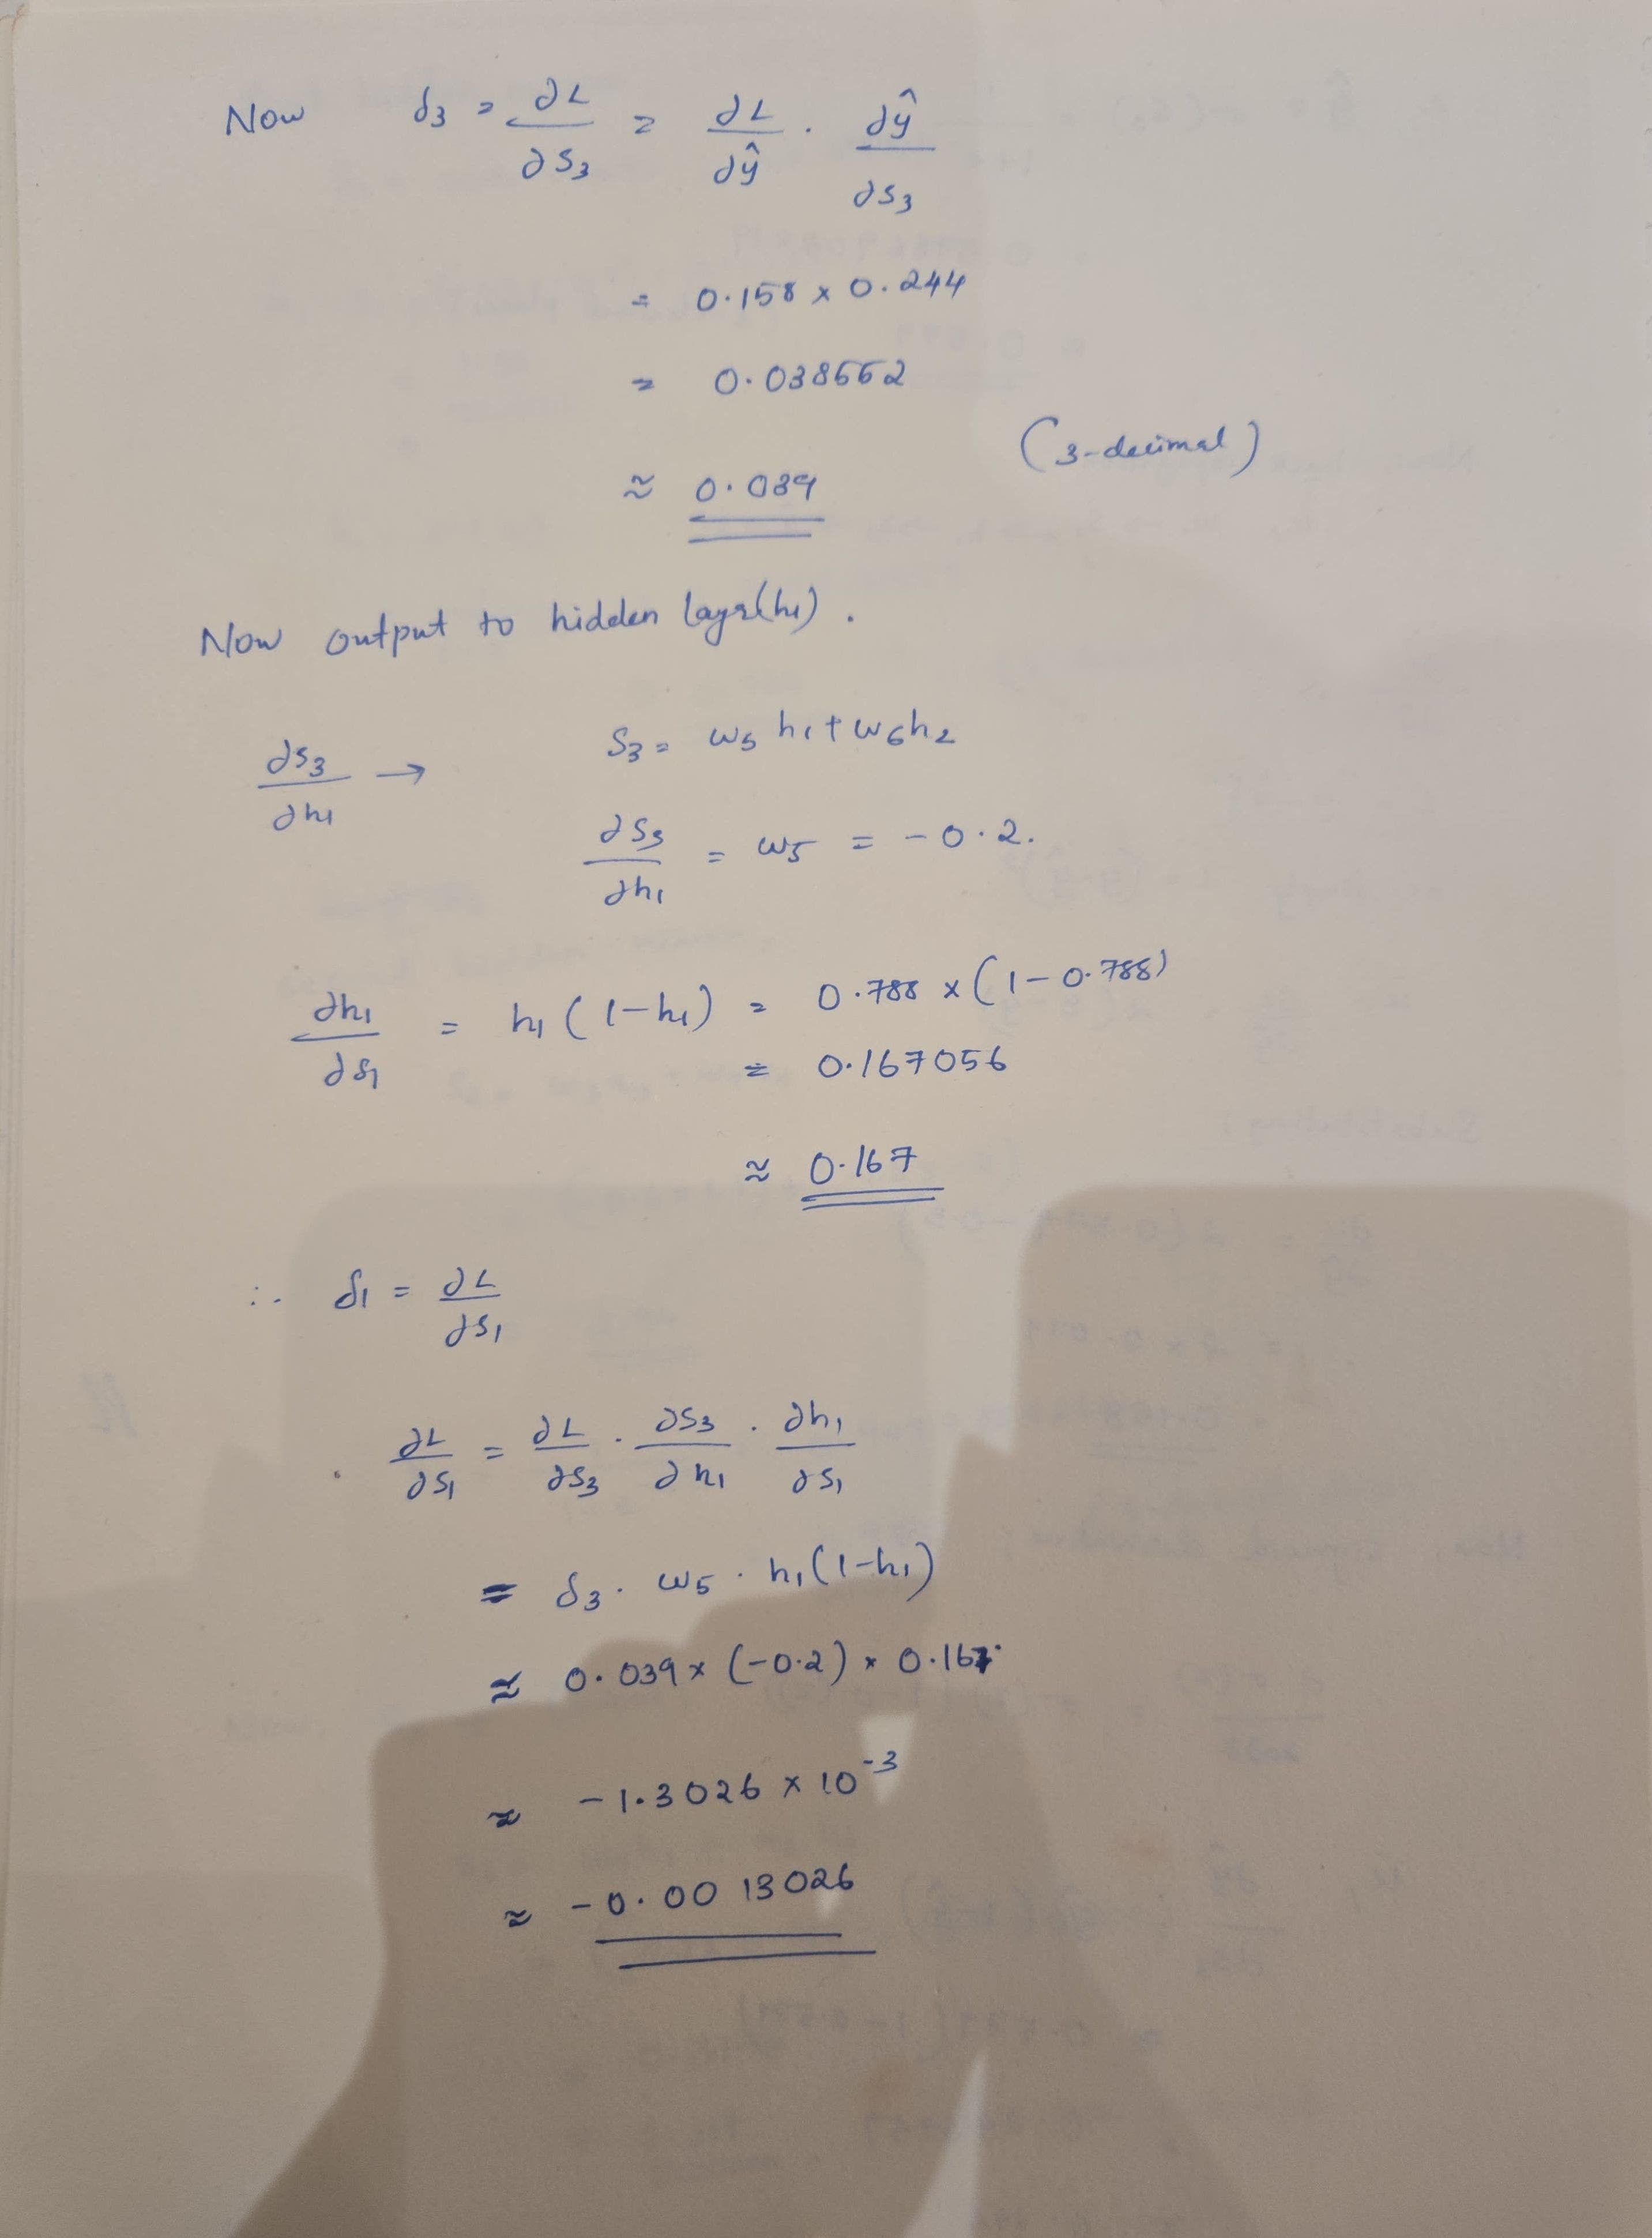

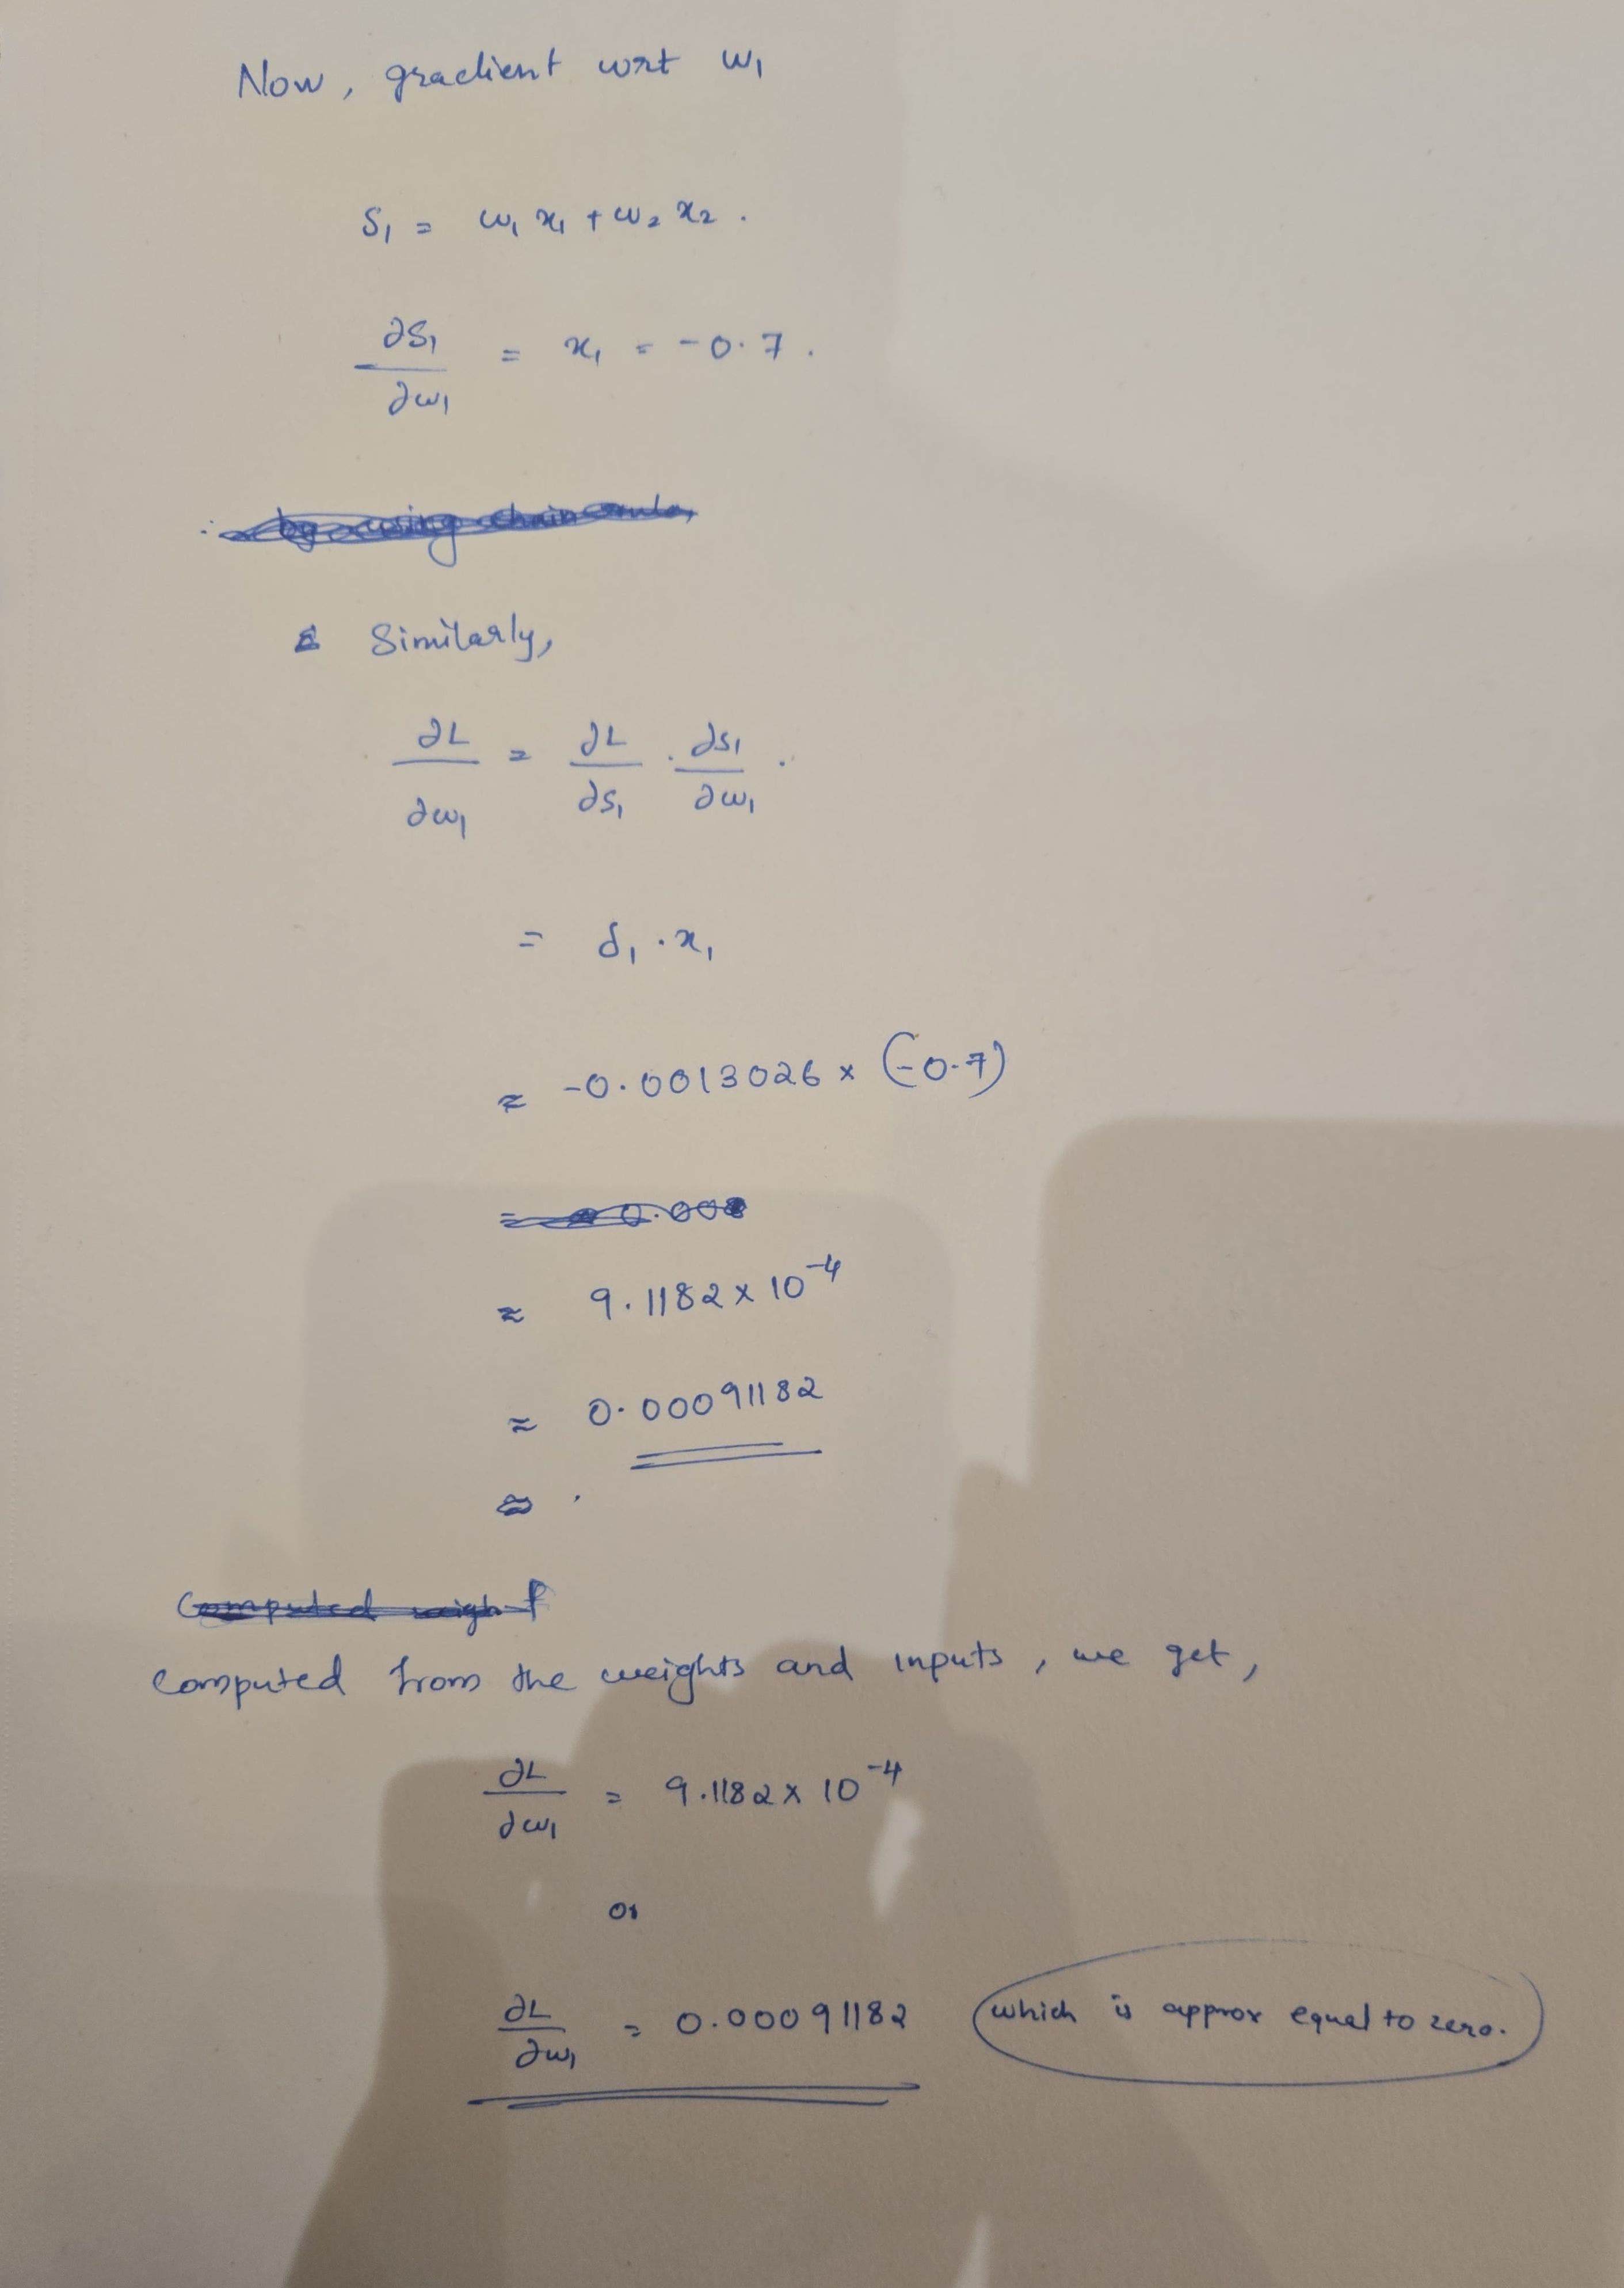

## **Question 2 – Multi-Layer Perceptron for Occupancy Data**
**Training samples: 8143**  
**Test samples: 9752**

In [2]:
#Import libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load datasets
train = pd.read_csv("trainData.txt")
test = pd.read_csv("testData.txt")

# Select features (train and test data)
X_train = train[['Temperature','Humidity','Light','CO2','HumidityRatio']]
y_train = train['Occupancy']
X_test = test[['Temperature','Humidity','Light','CO2','HumidityRatio']]
y_test = test['Occupancy']


# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **(b) Single hidden layer (5–h–1) with varying hidden units**

2 hidden units → Test Accuracy = 0.9924
4 hidden units → Test Accuracy = 0.9305
8 hidden units → Test Accuracy = 0.9646
16 hidden units → Test Accuracy = 0.9575
32 hidden units → Test Accuracy = 0.9222


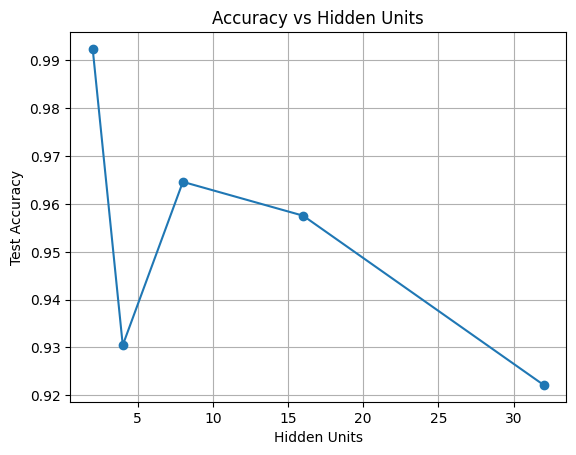

In [3]:
# Different hidden units to test
hidden_units = [2, 4, 8, 16, 32]
accuracies = []

##relu and binary entropy seems more accurate and  suitable for binary classification.
for h in hidden_units:
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(h, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=20, verbose=0)
    _, acc = model.evaluate(X_test, y_test, verbose=0)

    accuracies.append(acc)
    print(f"{h} hidden units → Test Accuracy = {acc:.4f}")

# Plotting
plt.plot(hidden_units, accuracies, marker='o')
plt.xlabel('Hidden Units')
plt.ylabel('Test Accuracy')
plt.title('Accuracy vs Hidden Units')
plt.grid(True) #just for the grids
plt.show()

### **(c) Two hidden layers – architectures tested**
5–4–4–1, 5–8–4–1, 5–16–8–1

In [4]:
architectures = [(4,4), (8,4), (16,8)]
results = []

for h1, h2 in architectures:
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(h1, activation='relu'),
        tf.keras.layers.Dense(h2, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=20, verbose=0)

    _, acc = model.evaluate(X_test, y_test, verbose=0)
    results.append(acc)
    print(f'Arch {h1}-{h2}:', acc)

Arch 4-4: 0.9488310217857361
Arch 8-4: 0.9288350939750671
Arch 16-8: 0.9117104411125183


### **(d) Discussion**
Small networks already perform well because Light and CO₂ strongly correlate with occupancy. The 4-unit model gave the best accuracy in my run. Larger networks did not improve performance and sometimes overfit slightly. Two-layer networks performed similarly to the best single-layer model. Overall, a simple network is enough for this dataset.

## **Question 3 – LSTM Stock Prediction Summary**
From reading the paper, the idea is that stock prices behave like sequences, so the model needs to understand how one day’s value relates to several days before it. The authors used LSTM networks because LSTMs can remember important patterns over time, which is useful since stock movements depend on past trends. They gathered historical data for Google and Nike, cleaned it, and normalized it so the model could learn the overall changes more easily. Their network used several stacked LSTM layers, allowing it to capture deeper patterns like steady rises or sudden drops. Dropout layers were placed between these LSTM layers to prevent the model from memorizing the training data too closely.

A final dense layer was then used to output the predicted opening price for the next day. The model was trained using mean squared error, and they tried multiple epoch settings to compare how well it learned with more training. As training increased, the predictions became closer to the real price movements. While the predictions weren’t perfect, the model followed the general direction and shape of the actual stock curves. This showed that LSTMs handle time-series data much better than simple neural networks. Overall, the paper demonstrated that using past information through LSTMs can help produce meaningful and realistic stock price forecasts.